In [8]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

df = pd.read_csv(r'C:\Users\Kanishka\Desktop\Movie.csv')

In [9]:
df.head()

,name,rating,genre,Year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


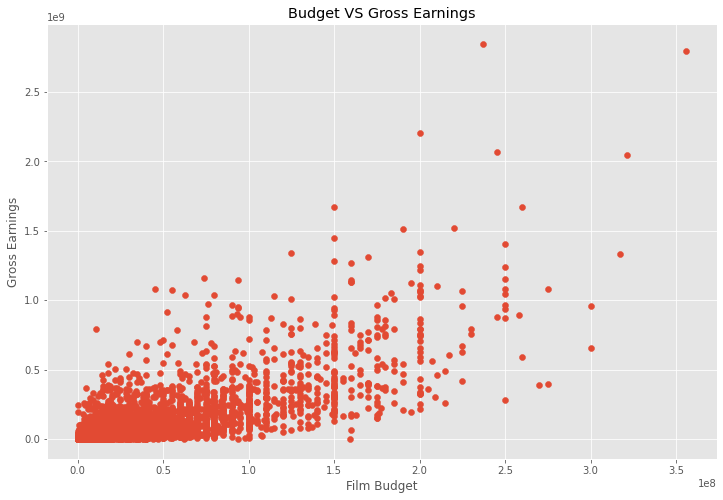

In [12]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

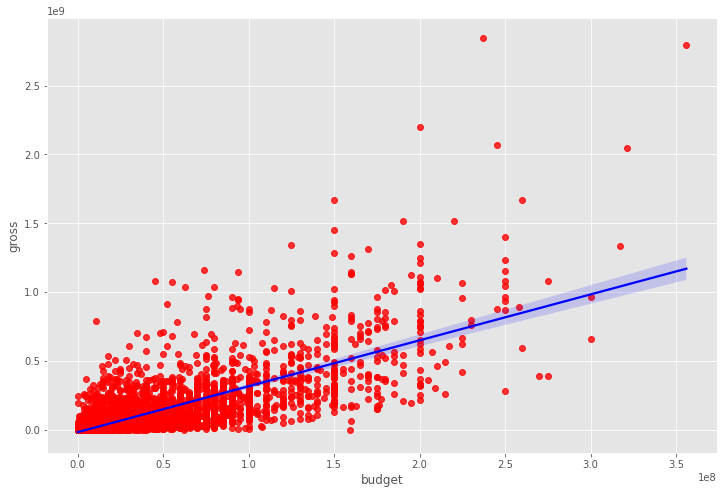

In [14]:
sns.regplot(x ='budget', y = 'gross', data =df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [19]:
#correlation
df.corr(method ='pearson')

,Year,score,votes,budget,gross
Year,1.000000,0.060132,0.202277,0.319842,0.268239
score,0.060132,1.000000,0.473916,0.071138,0.221932
votes,0.202277,0.473916,1.000000,0.439507,0.614634
budget,0.319842,0.071138,0.439507,1.000000,0.740206
gross,0.268239,0.221932,0.614634,0.740206,1.000000


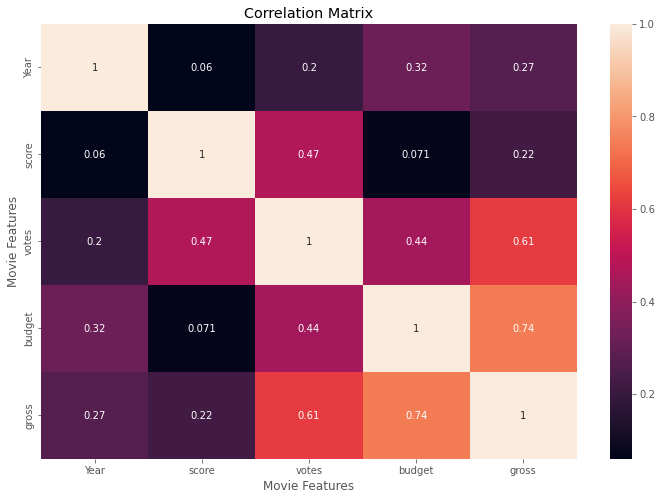

In [21]:
coorelation_matrix= df.corr(method ='pearson')
sns.heatmap(coorelation_matrix, annot = True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,Year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4694,6,6,1980,1303,8.4,927000,1798,2839,696,46,19000000,46998772,1429,46
1,3932,6,1,1980,1126,5.8,65000,1579,1158,215,47,4500000,58853106,451,4
2,3644,4,0,1980,1358,8.7,1200000,757,1820,1156,47,18000000,538375067,946,24
3,205,4,4,1980,1126,7.7,221000,889,1414,1472,47,3500000,83453539,1112,115
4,734,6,4,1980,1169,7.3,108000,719,351,272,47,6000000,39846344,1087,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,416,6,0,2020,903,6.6,140000,17,2395,1813,47,90000000,426505244,451,24
5420,3559,4,0,2020,711,6.5,102000,852,2314,148,47,85000000,319715683,1112,126
5421,1153,4,1,2020,903,5.6,53000,1812,2834,1468,47,175000000,245487753,1400,1
5422,3981,4,1,2020,756,6.8,42000,295,2094,637,6,135000000,111105497,12,0


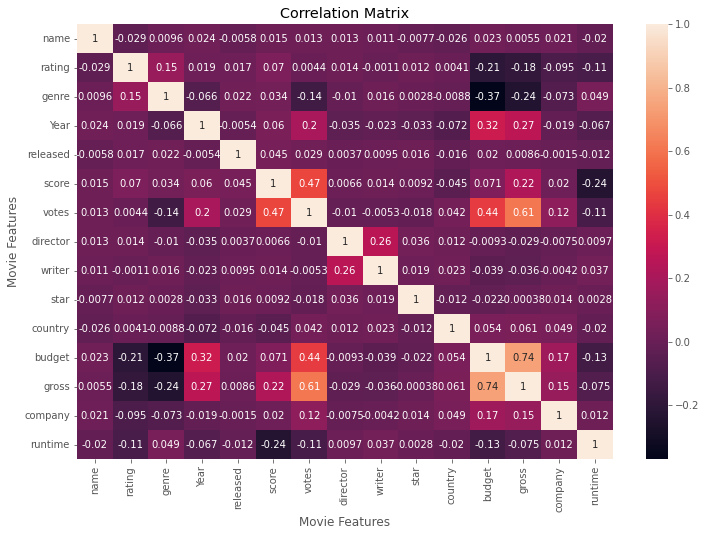

In [23]:
coorelation_matrix= df.corr(method ='pearson')
sns.heatmap(coorelation_matrix, annot = True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [25]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.029071
         genre       0.009564
         Year        0.024451
         released   -0.005770
                       ...   
runtime  country    -0.020165
         budget     -0.125092
         gross      -0.074719
         company     0.012108
         runtime     1.000000
Length: 225, dtype: float64

In [26]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368763
genre    budget    -0.368763
         gross     -0.243977
gross    genre     -0.243977
runtime  score     -0.235764
                      ...   
Year     Year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [27]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

In [28]:
high_corr

gross     votes       0.614634
votes     gross       0.614634
budget    gross       0.740206
gross     budget      0.740206
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
Year      Year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earning